# TASK - 1 

## Iris CLassification

In [71]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
data = pd.DataFrame(datasets.load_iris().data)

In [32]:
column_names = datasets.load_iris().feature_names
data.columns = column_names

In [34]:
data["Iris_flower"] =  datasets.load_iris().target

In [35]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris_flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
flower_type = datasets.load_iris().target_names
flower_type

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris_flower
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris_flower        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


(array([2., 1., 1., 1.]),
 array([0.   , 1.275, 2.55 , 3.825, 5.1  ]),
 <a list of 4 Patch objects>)

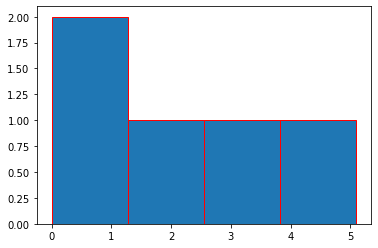

In [74]:
plt.hist(data.iloc[0],bins="auto",ec="r")

(array([2., 1., 1., 1.]),
 array([0.   , 1.225, 2.45 , 3.675, 4.9  ]),
 <a list of 4 Patch objects>)

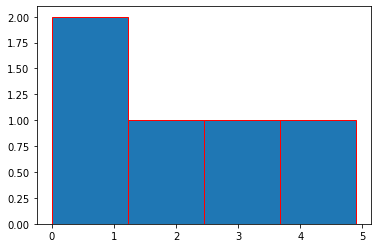

In [76]:
plt.hist(data.iloc[1],bins="auto",ec="r")

(array([2., 1., 1., 1.]),
 array([0.   , 1.175, 2.35 , 3.525, 4.7  ]),
 <a list of 4 Patch objects>)

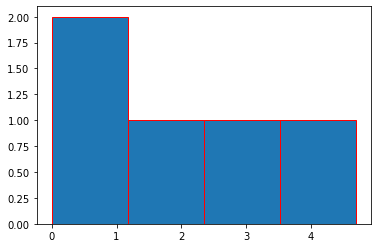

In [77]:
plt.hist(data.iloc[2],bins="auto",ec="r")

(array([2., 1., 1., 1.]),
 array([0.  , 1.15, 2.3 , 3.45, 4.6 ]),
 <a list of 4 Patch objects>)

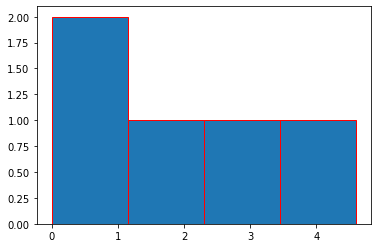

In [78]:
plt.hist(data.iloc[3],bins="auto",ec="r")

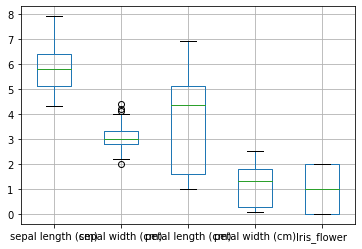

In [48]:
data.boxplot()

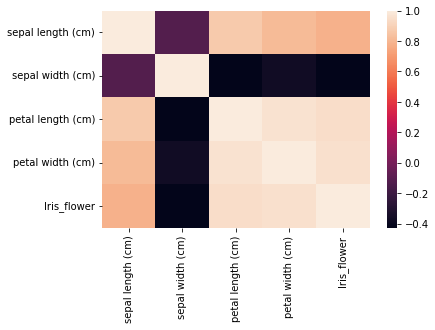

In [84]:
import seaborn as sns
sns.heatmap(data.corr())

In [49]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Iris_flower          0
dtype: int64

In [52]:
data.shape

(150, 5)

In [54]:
X = data.drop("Iris_flower",axis=1)
Y = data["Iris_flower"]

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = .50)

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC()

In [64]:
svc.fit(X_train,Y_train)

SVC()

In [65]:
Y_pred = svc.predict(X_test)

In [66]:
confusion_matrix(Y_test,Y_pred)

array([[24,  0,  0],
       [ 0, 21,  1],
       [ 0,  1, 28]])

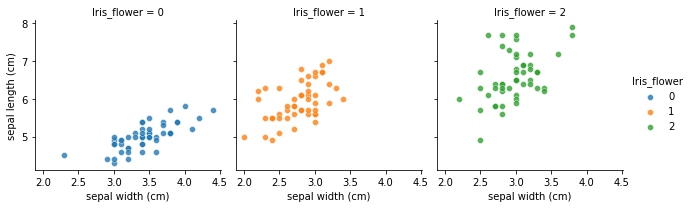

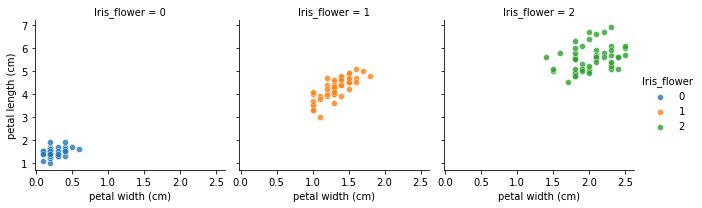

In [95]:
sea = sns.FacetGrid(data,col = "Iris_flower", hue = "Iris_flower") 
sea.map(sns.scatterplot, "sepal width (cm)", "sepal length (cm)", alpha = .8)
sea.add_legend()
sea = sns.FacetGrid(data,col = "Iris_flower", hue = "Iris_flower") 
sea.map(sns.scatterplot, "petal width (cm)", "petal length (cm)", alpha = .8)
sea.add_legend()

In [69]:
accuracy_score(Y_test,Y_pred)

0.9733333333333334